# Занятие 10. Интегрирование в Python

- [Аналитическое решение неопределённых интегралов](#Аналитическое-решение-неопределённых-интегралов)
    - [Пример 1](#Пример-1)
    - [Пример 2](#Пример-2)
    - [Пример 3](#Пример-3)
    - [Задача 1](#Задача-1)
- [Численное интегрирование функций](#Численное-интегрирование-функций)
    - [Функция quad](#Функция-quad)
    - [Численное интегрирование функций с особыми точками](#Численное-интегрирование-функций-с-особыми-точками)
    - [Задача 2](#Задача-2)
- [Интегрирование данных](#Интегрирование-данных)
- [Задача 3](#Задача-3)

Необходимые файлы:
- spectr.csv
- teo2b2_energy_no-acoust.spec
- trapezoidal_rule.png
- scan55555.txt

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sympy as smp  # бибилиотека для аналитичекой работы с функциями
from scipy.integrate import cumulative_trapezoid  # функция для интегрирования данных
from scipy.integrate import quad  # функция для численного интегрирования
from scipy.optimize import curve_fit

## Аналитическое решение неопределённых интегралов

Для работы с символьными выражениями в Python создана библиотека **sympy**. Документация к ней находится по ссылке: https://docs.sympy.org/latest/index.html

Если нам известно, как в явном виде записывается функция $f(x) = ...$ то возможны два случая:

1) Для функции существует первообразная и интеграл $\int f(x) = F(x)$ можно найти аналитически.

2) Первообразной не существует, но в заданных пределах можно получить численное значение интеграла.

Рассмотрим как с помошью Python брать интегралы аналитически.

### Пример 1

$ \int \sin^3 (x) e^{-5x}dx$:

In [2]:
# Определяем символы в sympy

x = smp.symbols("x", real=True)
x

x

In [3]:
smp.sin(x ** 2)

sin(x**2)

In [4]:
# перед математическими функциями добавляем smp, как до этого np и math

f = smp.sin(x) ** 3 * smp.exp(-5 * x)
f

exp(-5*x)*sin(x)**3

Для интегрирования пользуемся функцией **integrate** с обязательными параметрами в виде интегрируемой функции и переменной интегрирования:

In [5]:
x = smp.symbols("x", real=True)
f = smp.sin(x) ** 3 * smp.exp(-5 * x)
F = smp.integrate(f, x).simplify()
F

(-255*sin(x) + 65*sin(3*x) - 51*cos(x) + 39*cos(3*x))*exp(-5*x)/1768

### Пример 2

$ \int cos(bx) e^{-ax}dx$

In [6]:
a, b = smp.symbols("a b")
f = smp.cos(b * x) * smp.exp(-a * x)
smp.integrate(f, x)

Piecewise((x, Eq(a, 0) & Eq(b, 0)), (-I*x*exp(I*b*x)*sin(b*x)/2 + x*exp(I*b*x)*cos(b*x)/2 - I*exp(I*b*x)*cos(b*x)/(2*b), Eq(a, -I*b)), (I*x*exp(-I*b*x)*sin(b*x)/2 + x*exp(-I*b*x)*cos(b*x)/2 + I*exp(-I*b*x)*cos(b*x)/(2*b), Eq(a, I*b)), (-a*cos(b*x)/(a**2*exp(a*x) + b**2*exp(a*x)) + b*sin(b*x)/(a**2*exp(a*x) + b**2*exp(a*x)), True))

Если вам заранее известно, что параметры действительные и положительные, или наоборот, стоит указывать это сразу:

In [7]:
a, b = smp.symbols("a b", real=True, positive=True)
f = smp.cos(b * x) * smp.exp(-a * x)
F = smp.integrate(f, x)
F

-a*cos(b*x)/(a**2*exp(a*x) + b**2*exp(a*x)) + b*sin(b*x)/(a**2*exp(a*x) + b**2*exp(a*x))

Еще одна полезная опция для громоздких выражений **simplify**:

In [8]:
a, b = smp.symbols("a b", real=True, positive=True)
f = smp.cos(b * x) * smp.exp(-a * x)
F = smp.integrate(f, x).simplify()
F

(-a*cos(b*x) + b*sin(b*x))*exp(-a*x)/(a**2 + b**2)

### Пример 3

$ \int \frac{(1 + \sqrt{x})^{1/3}}{\sqrt x} dx $

При работе с рациональными дробями в sympy, следует явно их указывать с помощью функции **Rational**, чтобы избежать вычисления дроби и работы с полученным результатом в формате float:

In [9]:
f = (1 + smp.sqrt(x)) ** smp.Rational(1, 3) / smp.sqrt(x)
smp.integrate(f, x).simplify()

3*(sqrt(x) + 1)**(4/3)/2

### Задача 1

Пользуясь документацией вычислите определенный интеграл:

$ \int^{\infty}_{0} \frac{16 \arctan(x)}{1 + x^2}dx $

## Численное интегрирование функций

Если интеграл не имеет аналитического решения, или аналитическая запись вам не нужна, а нужно только быстро получить значение определенного интеграла, можно воспользоваться функцией **quad**

### Функция quad

Вычислим помощью функции **scipy.integrate.quad** интеграл

$I(f) =  \int_{1}^{2} (x + 1) \,dx $.

Обязательные аргументы функции **quad** - функция для интегрирования и пределы интегрирования.

In [10]:
def f(x):
    return x + 1


v, err = quad(f, 1, 2)
print(v)

2.5


Если мы интегрируем функцию с параметрами, например

$I(f) =  \int_{1}^{2} (a x + b) \,dx $,

то параметры можно указать в качестве необязательного аргумента **quad**, при этом список аргументов представляет из себя кортеж:

In [11]:
def f(x, a, b):
    return a * x + b


v, err = quad(f, 1, 2, args=(-1, 1))
print(v)

-0.5


 Если вы получили параметры в виде списка (например при аппроксимации), то их нужно сначала преобразовать в кортеж с помощью встроенной функции **tuple**:
 
**args = tuple(pars)** 

### Численное интегрирование функций с особыми точками

Рассмотрим функцию с особой точкой в нуле:

$I(f) =  \int_{-1}^{1} \frac{1}{\sqrt{|x|}} \,dx $.

Если проинтегрировать ее так же, как предыдущие функции, получим значение интеграла бесконечность  и сообщение об ошибке деления на ноль:
    

In [12]:
def f(x):
    return 1 / np.sqrt(abs(x))


v, err = quad(f, -1, 1)
print(v)

inf


/var/folders/mw/ghg5tdk92fb16x1cw0x26m400000gp/T/ipykernel_1545/797784712.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 / np.sqrt(abs(x))


Функция **quad** позволяет указывать особые точки в виде списка:

In [13]:
def f(x):
    return 1 / np.sqrt(abs(x))


v, err = quad(f, -1, 1, points=[0])
print(v)

3.9999999999999813


### Задача 2

Аппроксимируйте данные данные из файла scan55555.txt спомощью функции Лоренца и вычислите интеграл от получившейся кривой.

In [14]:
cols = "Pt_No  omega  eh_c01  eh_t01  sl_mon_b_vol  sl_mon_t_vol \
lmbd_countsroi1  lmbd_countsroi1_atten  lmbd_countsroi2  lmbd_countsroi2_atten  \
lmbd_countsroi3  lmbd_countsroi3_atten  dt".split()

data = pd.read_csv("scan55555.txt", sep=" ", skiprows=28, names=cols)
x = np.array(data["omega"])
y = np.array(data["lmbd_countsroi1"])

## Интегрирование данных

Если вы имеете дело с данными, для которых не можете подобрать апроксимирующую функцию, можно воспользоваться интегрированием по методу трапеций.

<img src = 'trapezoidal_rule.png' width = 200>

Для этого можно использовать функцию **numpy.trapz** или **scipy.integrate.trapz**, они работают одинакого.

Загрузим данные из файла:

In [15]:
data = pd.read_csv("spectr.csv")
data.head(4)

,Unnamed: 0,Energy,Intensity
0,0,4868.790527,3179.0
1,1,4869.915039,3539.0
2,2,4871.038086,3869.0
3,3,4872.163086,4377.0


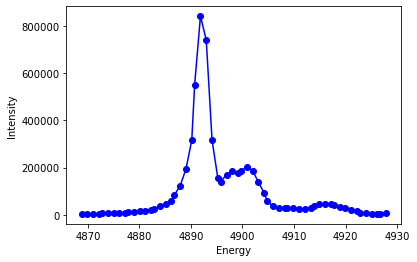

In [17]:
x = np.array(data["Energy"])
y = np.array(data["Intensity"])

plt.plot(x, y, "bo-")
plt.xlabel("Energy")
plt.ylabel("Intensity")
plt.show()

Функция **numpy.trapz** принимает один обязательный аргумент - значения y. Если доступны данные по x, записываем функцию в виде: 

**numpy.trapz(y, x=xdata)**

Дополнительные параметры в описании: https://numpy.org/doc/stable/reference/generated/numpy.trapz.html

In [18]:
Int = np.trapz(y, x=x)
Int

5824282.3349609375

Для визуализации интеграла от данных используется **cumulative_trapezoid**

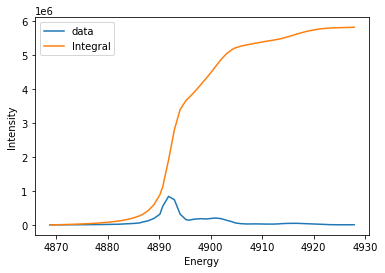

In [19]:
integral = cumulative_trapezoid(y, x, initial=0)

plt.plot(x, y, label="data")
plt.plot(x, integral, label="Integral")
plt.xlabel("Energy")
plt.ylabel("Intensity")
plt.legend()
plt.show()

## Задача 3

Запишете группы данных из файла teo2b2_energy_no-acoust.spec в отдельные файлы и сложите из в папку scans.

Последовательно считывайте данные из файлов в диапазоне 15049-15309, при этом:

1) Для данных из каждого файла аппроксимируйте зависимость lmbd_countsroi1(omega) функцией Лоренца.

2) вычислите интеграл под аппроксимирующей кривой, полученное значение запишите в список Intensity; 

5) из строки, начинающейся с "#P10" извлеките значение энергии для данного скана (выглядит как 4928.421875) и запишите в список Energy;

Постройте график Intensity(Energy).